In [5]:
import os
import shutil

# preparation de l'arboresence de la base de données

In [ ]:
directory = '../dataset/images'
files = os.listdir(directory)
for file in files[:10]:
    print(file)

In [ ]:
# on subdivise le dataset en sous-repertoires arbitrairement selon le premier chiffre du nom de fichier par convenience
directory = '../dataset/images'
files = os.listdir(directory)

for file in files:
    first_char = file[0]
    subdirectory = os.path.join(directory, first_char)
    if not os.path.exists(subdirectory):
        os.makedirs(subdirectory)
    shutil.move(os.path.join(directory, file), os.path.join(subdirectory, file))

In [10]:
subdirectories = [os.path.join(directory, d) for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

destination = os.path.join(directory, '0')
if not os.path.exists(destination):
    os.makedirs(destination)

for subdirectory in subdirectories:
    files = os.listdir(subdirectory)
    for file in files:
        if len(file) < 10:
            shutil.move(os.path.join(subdirectory, file), os.path.join(destination, file))

# Analyse de résolution du dataset

<Figure size 720x360 with 0 Axes>

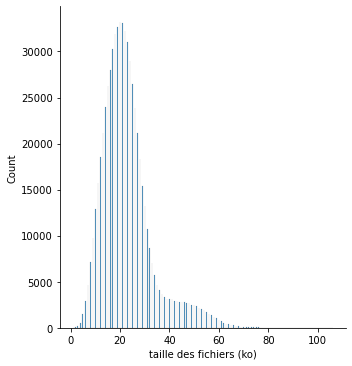

In [5]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

directory = '../dataset/images'
sizes = []

plt.figure(figsize=(10, 5));

for subdir, _, files in os.walk(directory):
    for file in files:
        if file.endswith('.jpg'):
            size_bytes = os.path.getsize(os.path.join(subdir, file))
            sizes.append(int(size_bytes/1000))

sns.displot(sizes);
plt.xlabel("taille des fichiers (ko)");

In [32]:
from PIL import Image
import os

directory = '../dataset/images'
resolutions = []

for subdir, _, files in os.walk(directory):  
    for file in files :
        if file.endswith('.jpg'):
            with Image.open(os.path.join(subdir, file)) as img:
                width, height = img.size
                resolutions.append((width, height))

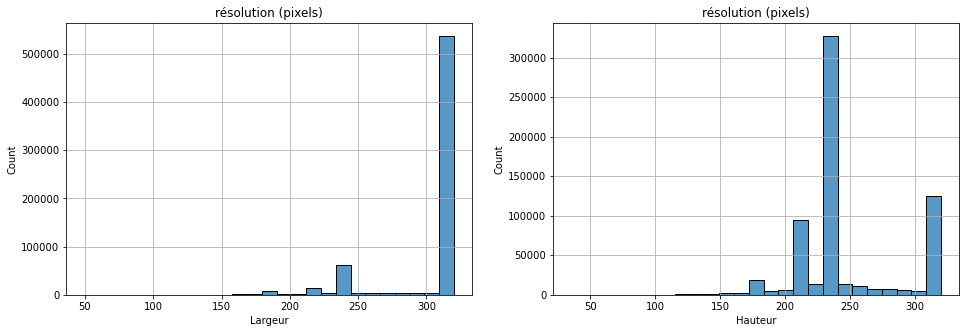

In [33]:
widths = [w for w, _ in resolutions]
heights = [h for _, h in resolutions]

fig, axs = plt.subplots(1, 2, figsize=(16, 5));
sns.histplot(widths, kde=False, label="Largeurs", ax=axs[0], bins = 25)
sns.histplot(heights, kde=False, label="Hauteurs", ax=axs[1], bins = 25)

for ax in axs:
    ax.grid(True)
    ax.set_title("résolution (pixels)");
    
axs[0].set_xlabel("Largeur");
axs[1].set_xlabel("Hauteur");

# Identification des images en nuances de gris

In [120]:
from PIL import Image

directory = '../dataset/images'

file = '2383.jpg'
if len(file) < 10:
    subdir = "0"
else:
    subdir = file[0]

def is_grayscale(image_path):
    img = Image.open(image_path).convert('RGB')
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            if r != g != b:
                return False
    return True

# assuming your image is stored at 'image.jpg'
if is_grayscale(os.path.join(directory, subdir, file)):
    print("The image is grayscale.")
else:
    print("The image is not grayscale.")

The image is not grayscale.


In [121]:
greyscale_list = []
rgb_list = []

for subdir, _, files in os.walk(directory):
    for file in files:
        if file.endswith('.jpg'):
            if (is_grayscale(os.path.join(subdir, file))):
                greyscale_list.append(file)
            else:
                rgb_list.append(file)  
                

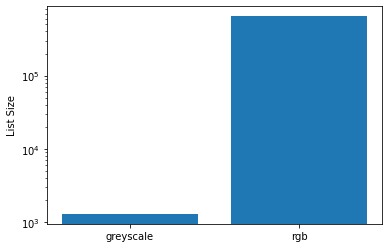

In [131]:
import seaborn as sns

list_sizes = [len(greyscale_list), len(rgb_list)]
list_labels = ['greyscale', 'rgb']

plt.bar(list_labels, list_sizes)
plt.yscale('log')
plt.ylabel('List Size')
plt.show()

# Identification des images avec fond blanc

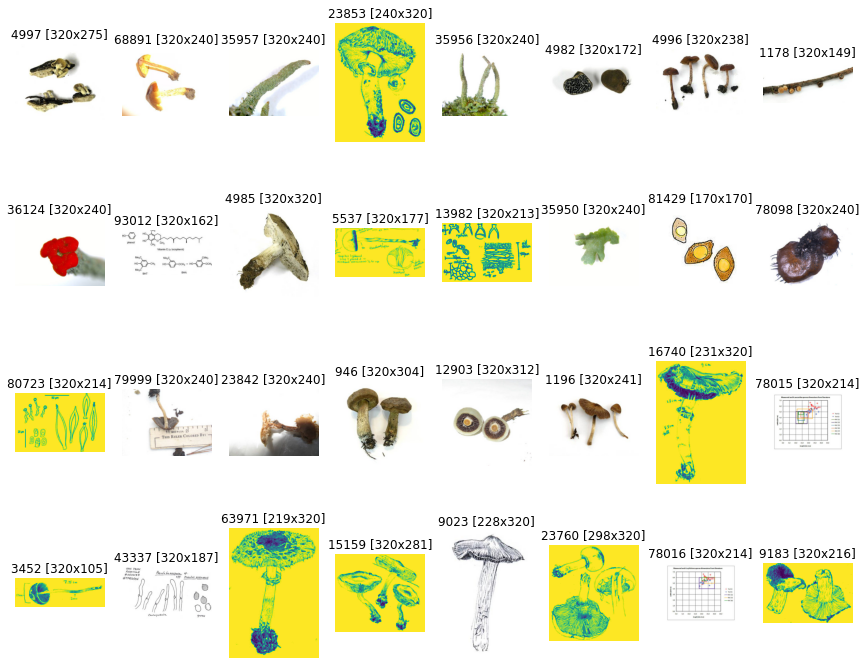

In [60]:
import matplotlib.pyplot as plt
from PIL import Image

rows = 4
cols = 8

fig, axs = plt.subplots(rows, cols, figsize=(15, 12))

for i, file in enumerate(white_background[:cols*rows]):
    if len(file) < 10:
        subdir = "0"
    else:
        subdir = file[0]
    img = Image.open(os.path.join(directory, subdir, file))
    width, height = img.size
    axs[i // cols, i % cols].imshow(img)
    axs[i // cols, i % cols].axis('off')
    axs[i // cols, i % cols].set_title(file[:-4] + " [" + str(width) + "x" + str(height) + "]")

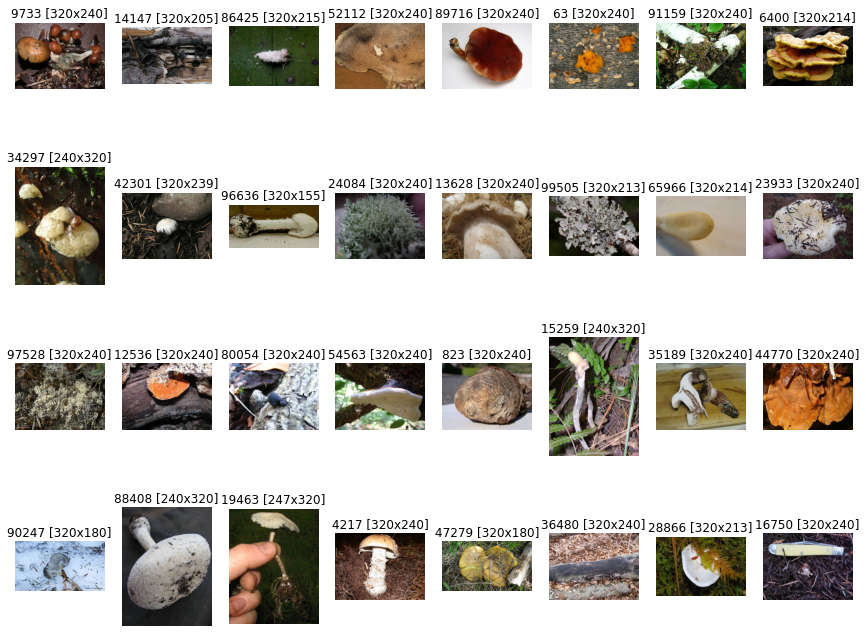

In [62]:
fig, axs = plt.subplots(rows, cols, figsize=(15, 12))

for i, file in enumerate(regular_background[:cols*rows]):
    if len(file) < 10:
        subdir = "0"
    else:
        subdir = file[0]
    img = Image.open(os.path.join(directory, subdir, file))
    width, height = img.size
    axs[i // cols, i % cols].imshow(img)
    axs[i // cols, i % cols].axis('off')
    axs[i // cols, i % cols].set_title(file[:-4] + " [" + str(width) + "x" + str(height) + "]")

# analyse couplée aux labels

In [98]:
import pandas as pd

df = pd.read_csv('../dataset/observations_mushroom.csv', index_col='image_id')

/var/folders/b5/l_vklzzn26j1cdtjbptl22jr0000gp/T/ipykernel_49259/30591610.py:3: DtypeWarning: Columns (2,5,25,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/observations_mushroom.csv', index_col='image_id')


In [106]:
df.drop(columns = ['observation', 'date','user','image_url','location','gbif_info/kingdom', 'gbif_info/familyKey','gbif_info/speciesKey','gbif_info/orderKey','gbif_info/classKey']).head()
#df.head(10)

,image_lien,label,gbif_info/family,gbif_info/rank,gbif_info/phylum,gbif_info/species,gbif_info/confidence,gbif_info/matchType,gbif_info/status,gbif_info/usageKey,...,gbif_info/canonicalName,gbif_info/phylumKey,gbif_info/class,gbif_info/synonym,gbif_info/scientificName,gbif_info/genus,gbif_info/order,thumbnail,gbif_info/note,gbif_info
image_id,,,,,,,,,,,,,,,,,,,,,
1,1.jpg,Xylaria polymorpha,Xylariaceae,SPECIES,Ascomycota,Xylaria polymorpha,98.0,EXACT,ACCEPTED,5255104.0,...,Xylaria polymorpha,95.0,Sordariomycetes,False,"Xylaria polymorpha (Pers.) Grev., 1824",Xylaria,Xylariales,1,NaN,NaN
2,2.jpg,Xylaria magnoliae,Xylariaceae,SPECIES,Ascomycota,Xylaria magnoliae,98.0,EXACT,ACCEPTED,3461845.0,...,Xylaria magnoliae,95.0,Sordariomycetes,False,"Xylaria magnoliae J.D. Rogers, 1979",Xylaria,Xylariales,1,NaN,NaN
3,3.jpg,Xylaria hypoxylon,Xylariaceae,SPECIES,Ascomycota,Xylaria hypoxylon,98.0,EXACT,ACCEPTED,8631710.0,...,Xylaria hypoxylon,95.0,Sordariomycetes,False,"Xylaria hypoxylon (L.) Grev., 1824",Xylaria,Xylariales,1,NaN,NaN
4,4.jpg,Xylaria hypoxylon,Xylariaceae,SPECIES,Ascomycota,Xylaria hypoxylon,98.0,EXACT,ACCEPTED,8631710.0,...,Xylaria hypoxylon,95.0,Sordariomycetes,False,"Xylaria hypoxylon (L.) Grev., 1824",Xylaria,Xylariales,1,NaN,NaN
5,5.jpg,Xeromphalina,Mycenaceae,GENUS,Basidiomycota,NaN,93.0,EXACT,ACCEPTED,2527268.0,...,Xeromphalina,34.0,Agaricomycetes,False,Xeromphalina Kühner & Maire,Xeromphalina,Agaricales,1,NaN,NaN


In [107]:
df.columns

Index(['image_lien', 'observation', 'label', 'image_url', 'user', 'date',
       'gbif_info/kingdom', 'gbif_info/family', 'gbif_info/speciesKey',
       'gbif_info/rank', 'gbif_info/phylum', 'gbif_info/orderKey',
       'gbif_info/species', 'gbif_info/confidence', 'gbif_info/classKey',
       'gbif_info/matchType', 'gbif_info/familyKey', 'gbif_info/status',
       'gbif_info/usageKey', 'gbif_info/kingdomKey', 'gbif_info/genusKey',
       'gbif_info/canonicalName', 'gbif_info/phylumKey', 'gbif_info/class',
       'gbif_info/synonym', 'gbif_info/scientificName', 'gbif_info/genus',
       'gbif_info/order', 'thumbnail', 'location', 'gbif_info/note',
       'gbif_info'],
      dtype='object')

In [85]:
species_counts = df['gbif_info/species'].value_counts()
least_common_species = species_counts.index[-1]
least_common_species_count = species_counts.iloc[-1]

print(f"The species with the least number of occurrences is {least_common_species} with {least_common_species_count} occurrences.")

file = df[df['gbif_info/species'] == least_common_species]['image_lien'].iloc[0]

type(file)

The species with the least number of occurrences is Puccinia dentariae with 1 occurrences.


str

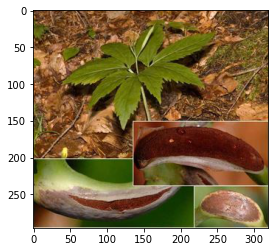

In [88]:
if len(file) < 10:
    subdir = "0"
else:
    subdir = file[0]
img = Image.open(os.path.join(directory, subdir, file))
plt.imshow(img)

In [109]:
from IPython.display import display, HTML

df[df['gbif_info/species'] == least_common_species].head(1).T


image_id,87662
image_lien,87662.jpg
observation,46149
label,Puccinia dentariae
image_url,http://mushroomobserver.org/images/320/87662
user,1383
date,2010-06-01 13:07:55
gbif_info/kingdom,Fungi
gbif_info/family,Pucciniaceae
gbif_info/speciesKey,7239565.0
gbif_info/rank,SPECIES


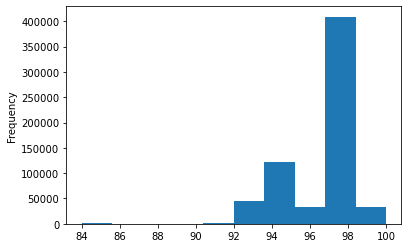

In [110]:
df['gbif_info/confidence'].plot.hist()
plt.show()

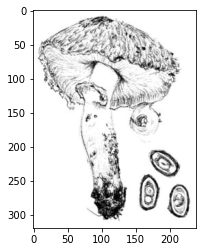

In [117]:
file = '23853.jpg'
if len(file) < 10:
    subdir = "0"
else:
    subdir = file[0]
img = Image.open(os.path.join(directory, subdir, file))
plt.imshow(img, cmap='gray')

# Analyse des variables explicatives

In [163]:
# Random selection of a sub-samples of all jpg images
import os
import random

def select_random_images(directory, num_images=1000, min_size=[320, 320], max_size=[320, 320]):
    # Get list of all JPG files in directory and subdirectories
    jpg_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg'):
                # Get size of image
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    width, height = img.size
                

                # Check if image size is within specified range
                if (min_size is None or (width >= min_size[0] and height >= min_size[1])) and \
                   (max_size is None or (width <= max_size[0] and height <= max_size[1])):
                    jpg_files.append(image_path)
    
    # Select num_images random files from the list
    selected_files = random.sample(jpg_files, num_images)
    
    return selected_files

directory = '../dataset/images'
selected_images = select_random_images(directory)

In [164]:
from PIL import Image
import numpy as np

def flatten_images(image_list):
    flattened_images = []
    for image_path in image_list:
        # Open image and convert to grayscale
        img = Image.open(image_path).convert('L')
        
        # Flatten image data and append to list
        flattened_images.append(np.array(img).flatten())
    
    # Convert list of flattened images to numpy array
    flattened_images_array = np.array(flattened_images)
    
    return flattened_images_array

# assuming your selected images are already defined as selected_images
flattened_images = flatten_images(selected_images)

In [181]:
# Import library
from clustimage import Clustimage

# init with PCA method
# cl = Clustimage(method='pca')
cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=True,
                dim=(320,320),
                params_pca={'n_components':0.95})

# Retrieve data
X = flattened_images[:200]

# Preprocessing, feature extraction, embedding and cluster evaluation
# results = cl.fit_transform(X)
results = cl.fit_transform(X,
                           cluster='kmeans',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=25,
                           cluster_space='high')

[clustimage] >INFO> filepath is set to [/var/folders/b5/l_vklzzn26j1cdtjbptl22jr0000gp/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/b5/l_vklzzn26j1cdtjbptl22jr0000gp/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/b5/l_vklzzn26j1cdtjbptl22jr0000gp/T/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/var/folders/b5/l_vklzzn26j1cdtjbptl22jr0000gp/T/clustimage]
100%|████████████████████████████████████████| 200/200 [00:00<00:00, 631.88it/s]
[clustimage] >INFO> Extracting features using method: [pca]


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [102400] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [127] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [102400] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Extracted features using [pca]: samples=200, features=127
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clustimage] >INFO> Saving data in memory.
[clustimage] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clustimage] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|████████████████████████| 22/22 [00:00<00:00, 28.35it/s]
[clustimage] >INFO> Optimal number clusters detected: [4].
[clustimage] >INFO> Fin.
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (200, 127) feature-space.


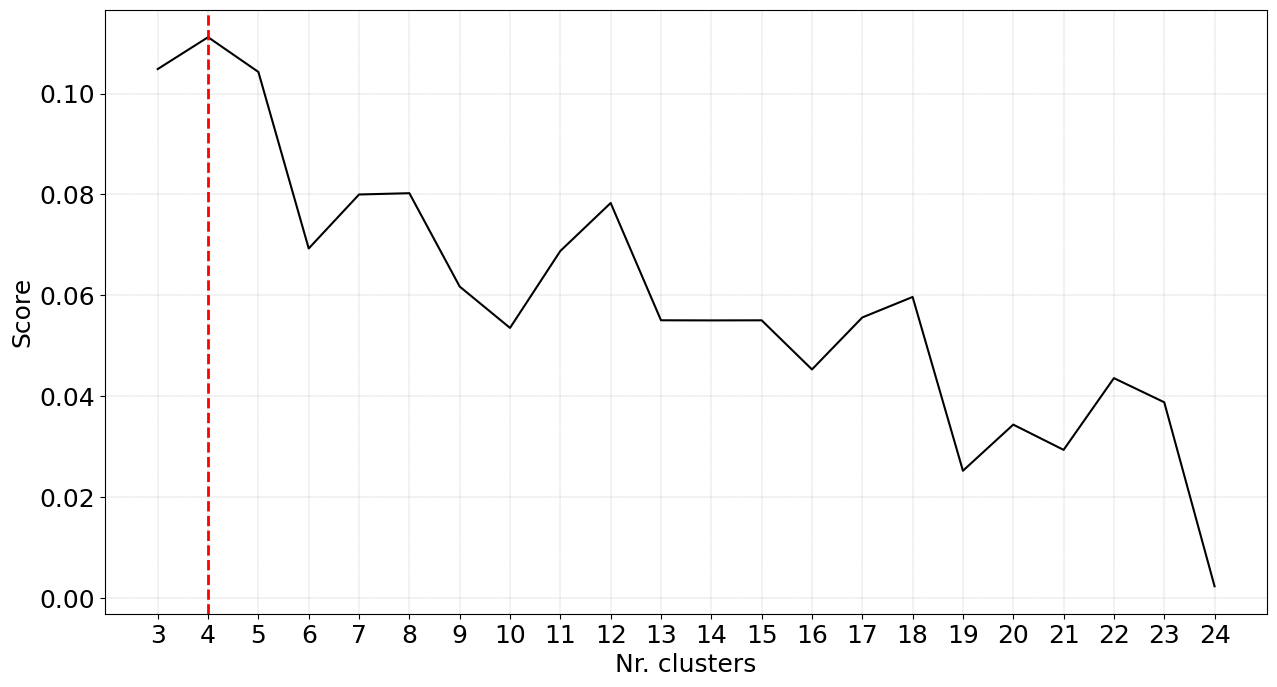

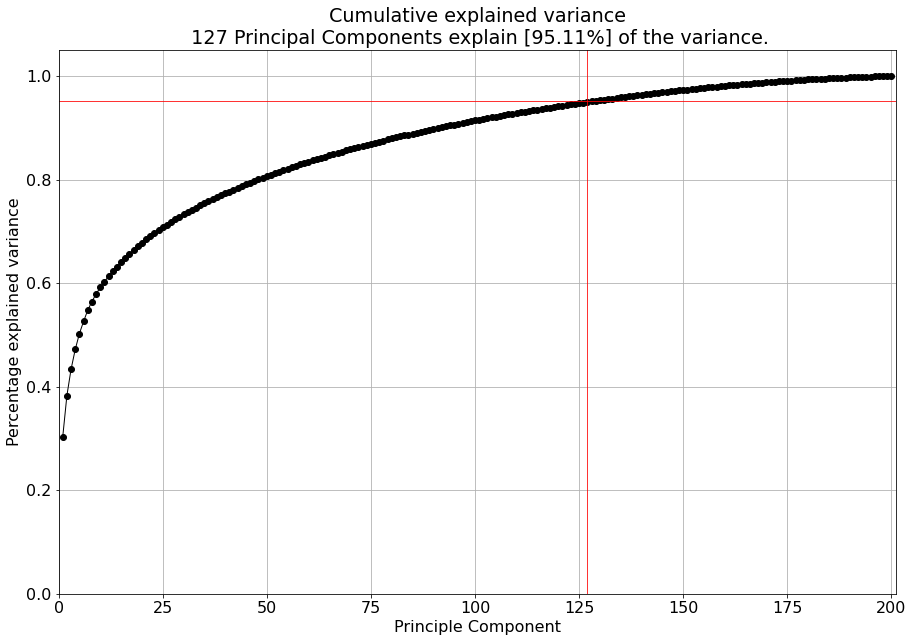

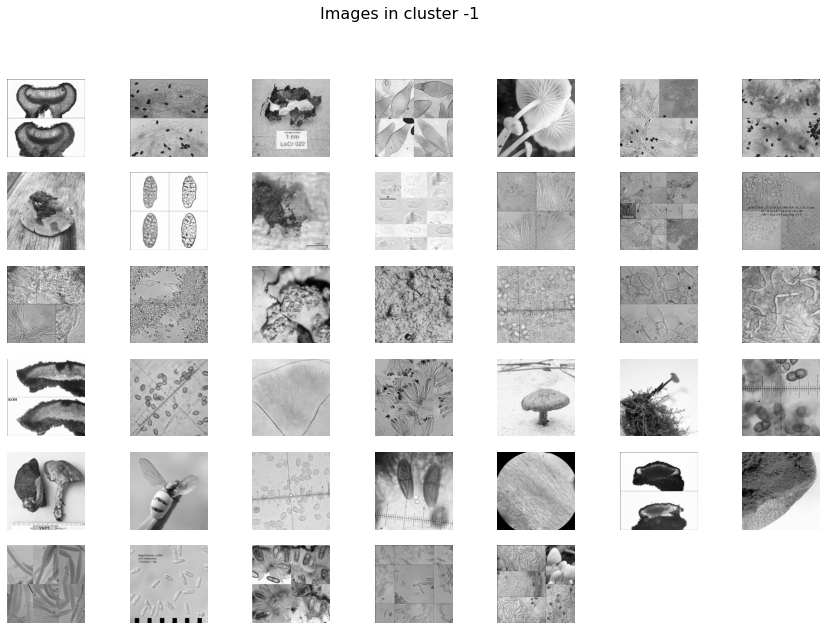

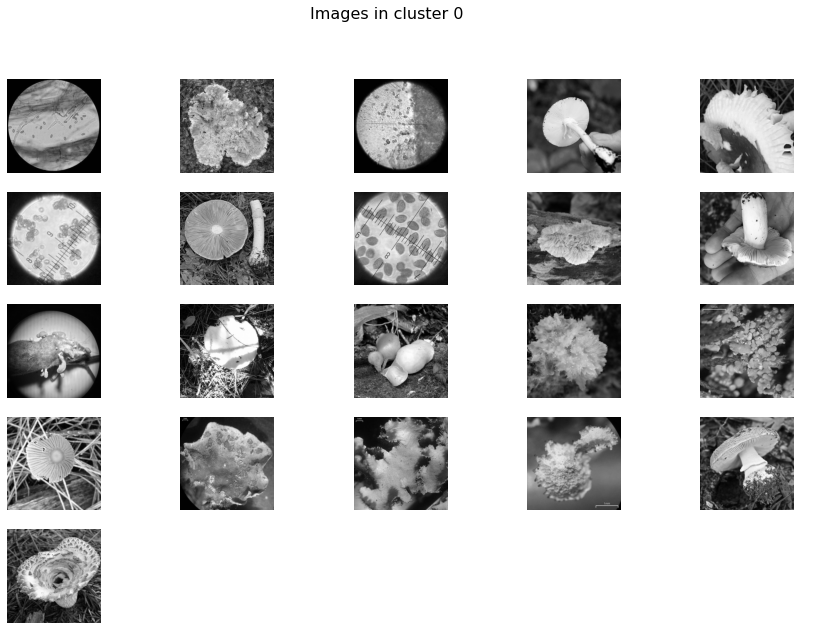

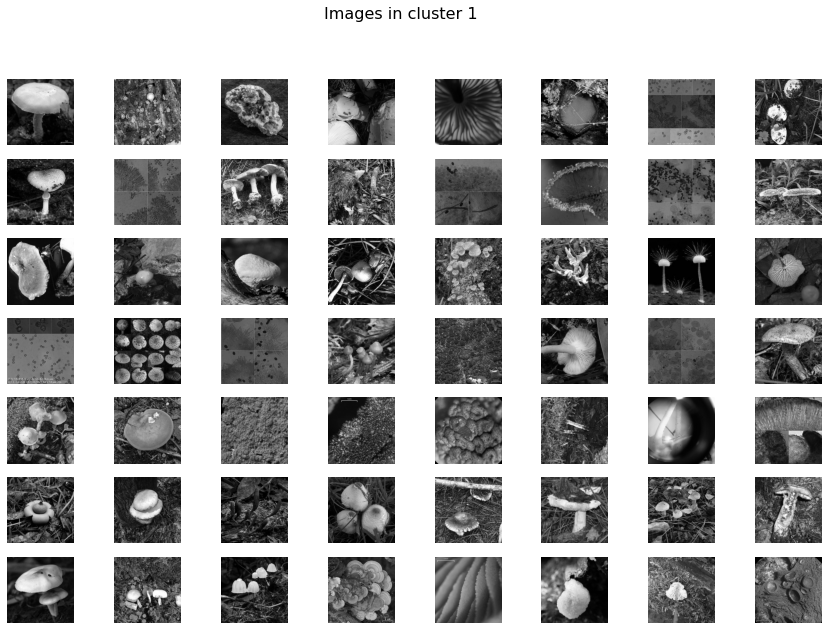

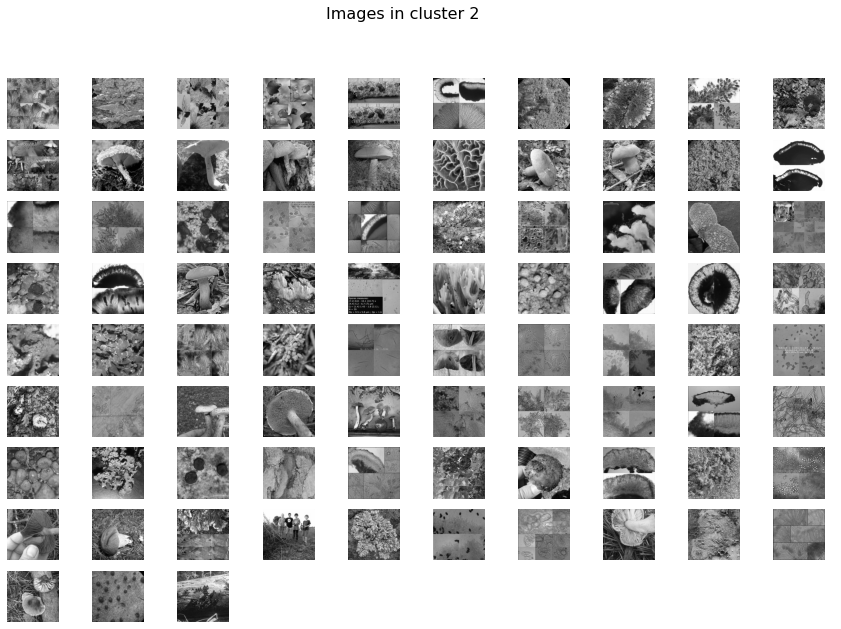

In [182]:
# Silhouette plots
cl.clusteval.plot()

# PCA explained variance plot
cl.pca.plot()


# Plot images per cluster or all clusters
cl.plot()
#cl.plot(cmap='binary')

In [263]:
from IPython.display import display, Image
from PIL import Image as PILImage
import numpy as np

def display_image_and_label(clust: Clustimage, index: int, label : int):
    """
    Displays the image and its label at the given index from a clustimage object.

    :param clust: The clustimage object.
    :param index: The index of the image to display.
    """
    # Get the image data and label at the given index
    idx = 0
    label_cnt = 0

    while idx < len(clust.results['img']) and label_cnt <= index:
        if clust.results['labels'][idx] == label:
            label_cnt = label_cnt + 1
        idx = idx + 1
    
    img_data = clust.results['img'][idx-1].reshape((320,320))
    label = clust.results['labels'][idx-1]

    # Convert the image data to a PIL Image
    img = PILImage.fromarray(np.uint8(img_data))

    # Display the image and its label
    display(img)
    print(f'Label: {label}')

In [276]:
from clustimage import clustimage
from IPython.display import display, Image
from PIL import Image as PILImage
import numpy as np
import ipywidgets as widgets

# Create a Text widget to enter the image index
text_label = widgets.Text(placeholder='Enter image index')

# Create a Label widget with the text "Index"
label_label = widgets.Label('Label ')

# Create a Text widget to enter the image index
text = widgets.Text(placeholder='Enter image index')

# Create a Label widget with the text "Index"
label = widgets.Label('Index ')

# Create an Output widget to display the images
output = widgets.Output()

# Create a HBox widget to arrange the slider and button horizontally
hbox_label = widgets.HBox([label_label, text_label])

# Create a HBox widget to arrange the slider and button horizontally
hbox = widgets.HBox([label, text])

# Display the Text widget
display(hbox_label)
display(hbox)
display(output)

# Update the displayed image and label when the text value changes
def on_text_change(change):
    with output:
        try:
            output.clear_output(wait=True)
            index = int(change['new'])
            label = int(text_label.value)
            display_image_and_label(cl, index, label)
        except ValueError:
            pass

text.observe(on_text_change, names='value')

Output()

# Identification des images prises au microscope 

In [271]:
import numpy as np

def has_black_background(image: np.ndarray) -> bool:
    """
    Returns True if the given image has a black background, False otherwise.

    :param image: The image as a NumPy array.
    :return: True if the image has a black background, False otherwise.
    """
    # Get the dimensions of the image
    height, width = image.shape

    # Check the pixels in the corners of the image
    if (np.all(image[0, 0] == 0) and
        np.all(image[0, width-1] == 0) and
        np.all(image[height-1, 0] == 0) and
        np.all(image[height-1, width-1] == 0)):
        return True
    else:
        return False

In [278]:
from PIL import Image, ImageStat
import os

directory = '../dataset/images'
microscope_images = []


for subdir, _, files in os.walk(directory):
    for file in files:
        if file.endswith('.jpg'):
            with Image.open(os.path.join(subdir, file)) as img:
                if has_black_background(np.array(img.convert('L'))):
                    microscope_images.append(file)
                    print(file)


88904.jpg
85401.jpg
92954.jpg
84174.jpg
707329.jpg
701323.jpg
707330.jpg
636687.jpg
672006.jpg
645682.jpg
612902.jpg
665552.jpg
675999.jpg
605729.jpg
612527.jpg
616769.jpg
690518.jpg
619499.jpg
698030.jpg
639832.jpg
662605.jpg
678649.jpg
684394.jpg
675345.jpg
631275.jpg
679782.jpg
624491.jpg
645709.jpg
689471.jpg
624485.jpg
626245.jpg
629604.jpg
621516.jpg
619937.jpg
619936.jpg
601176.jpg
605476.jpg
681004.jpg
658017.jpg
645708.jpg
675344.jpg
612491.jpg
684395.jpg
639833.jpg
653340.jpg
634495.jpg
689935.jpg
621891.jpg
630022.jpg
635628.jpg
696197.jpg
682109.jpg
644748.jpg
631499.jpg
612526.jpg
665962.jpg
645683.jpg
638898.jpg
668705.jpg
677143.jpg
672013.jpg
696424.jpg
677802.jpg
636686.jpg
652458.jpg
615713.jpg
672005.jpg
671242.jpg
647096.jpg
677155.jpg
665551.jpg
645681.jpg
668707.jpg
671083.jpg
663493.jpg
630020.jpg
630746.jpg
640289.jpg
644789.jpg
631289.jpg
624860.jpg
665196.jpg
632970.jpg
634332.jpg
662606.jpg
667018.jpg
631276.jpg
610723.jpg
610737.jpg
605474.jpg
635574.jpg
631

608559.jpg
616767.jpg
665979.jpg
612529.jpg
618004.jpg
665548.jpg
668722.jpg
638667.jpg
612924.jpg
672008.jpg
604161.jpg
683032.jpg
614358.jpg
641371.jpg
683756.jpg
683018.jpg
688159.jpg
642877.jpg
612926.jpg
630239.jpg
615913.jpg
618774.jpg
643980.jpg
644745.jpg
695487.jpg
644786.jpg
611142.jpg
690474.jpg
678137.jpg
645705.jpg
681021.jpg
624489.jpg
645711.jpg
623443.jpg
638063.jpg
648590.jpg
625998.jpg
624463.jpg
601185.jpg
689440.jpg
645710.jpg
640668.jpg
645704.jpg
629345.jpg
631278.jpg
644817.jpg
667016.jpg
665173.jpg
621080.jpg
689939.jpg
631330.jpg
664494.jpg
654219.jpg
630238.jpg
683794.jpg
615709.jpg
677832.jpg
604162.jpg
414245.jpg
598772.jpg
598770.jpg
598774.jpg
598768.jpg
598447.jpg
599010.jpg
599011.jpg
599013.jpg


In [279]:
len(microscope_images)

814